In [1]:
import os

### importing data

In [2]:
os.getcwd()

'C:\\Users\\admi\\Study Project'

In [3]:
file1 = 'Ajaccio_1981-01-01_2018-12-31.nc'
file2 = 'Solenzara_1981-01-01_2018-12-31.nc'

In [4]:
import xarray as xr

In [5]:
srcXR1 = xr.open_dataset(file1)
srcXR2 = xr.open_dataset(file2)

In [6]:
srcXR1.info()
srcXR2.info()

xarray.Dataset {
dimensions:
	date = 13879 ;

variables:
	datetime64[ns] date(date) ;
	float64 RR(date) ;
		RR:units = mm ;
		RR:long_name = daily rain rates ;
	float64 TN(date) ;
		TN:units = degC ;
		TN:long_name = daily minimum temperature ;
	float64 TX(date) ;
		TX:units = degC ;
		TX:long_name = daily maximum temperature ;

// global attributes:
	:Conventions = CF-1.6 ;
	:title = Ajaccio ;
}xarray.Dataset {
dimensions:
	date = 13879 ;

variables:
	datetime64[ns] date(date) ;
	float64 RR(date) ;
		RR:units = mm ;
		RR:long_name = daily rain rates ;
	float64 TN(date) ;
		TN:units = degC ;
		TN:long_name = daily minimum temperature ;
	float64 TX(date) ;
		TX:units = degC ;
		TX:long_name = daily maximum temperature ;

// global attributes:
	:Conventions = CF-1.6 ;
	:title = Solenzara ;
}

#### changing variable dimension from 'date' to 'time'

In [7]:
srcXR1=srcXR1.rename(date='time')
srcXR2=srcXR2.rename(date='time')

In [8]:
srcXR1.dims
srcXR1.data_vars
srcXR1.coords
srcXR1.coords['time']

<xarray.DataArray 'time' (time: 13879)>
array(['1981-01-01T00:00:00.000000000', '1981-01-02T00:00:00.000000000',
       '1981-01-03T00:00:00.000000000', ..., '2018-12-29T00:00:00.000000000',
       '2018-12-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2018-12-31

In [9]:
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")

In [10]:
import xclim as xc
from xclim.core.calendar import percentile_doy
from xclim.indices import tx90p
from xclim.indices import warm_spell_duration_index

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Temperature indices(TX90p, WSDI, TXx and TNn)

### tx90p (Percentile index) : Ajaccio

In [12]:
mean1 = (srcXR1.TX + srcXR1.TN)/2
srcXR1= srcXR1.assign(TM=mean1)

srcXR1['TM'] = srcXR1['TM'].assign_attrs(units = 'degC', long_name = 'daily mean temperature')

tas1= srcXR1.TM

#np.percentile(srcXR1.TX,90)  #28.8
#np.percentile(srcXR2.TX,90)  #29.5

t901= percentile_doy(tas1, per=90).sel(percentiles=90)
hot_days1= tx90p(tas1, t901)

In [13]:
print(hot_days1)

<xarray.DataArray 'TM' (time: 38)>
array([17, 25, 27,  7, 24, 32, 31, 31, 28, 34, 15, 26, 29, 45, 21, 29, 30,
       13, 35, 46, 42, 35, 70, 35, 22, 55, 37, 34, 46, 34, 41, 40, 43, 55,
       61, 64, 51, 81])
Coordinates:
  * time         (time) datetime64[ns] 1981-01-01 1982-01-01 ... 2018-01-01
    percentiles  int32 90
Attributes:
    units:    d


### tx90p (Percentile index) : Solenzara

In [14]:
mean2 = (srcXR2.TX + srcXR2.TN)/2
srcXR2= srcXR2.assign(TM=mean2)
tas2= srcXR2.TM

tas2 = tas2.assign_attrs(units = 'degC', long_name = 'daily mean temperature')

t902= percentile_doy(tas2, per=90).sel(percentiles=90)
hot_days2= tx90p(tas2, t902)

In [15]:
print(hot_days2)

<xarray.DataArray 'TM' (time: 38)>
array([30, 26, 22, 13, 31, 32, 39, 30, 18, 42, 12, 25, 18, 46, 36, 14, 27,
       23, 30, 32, 55, 34, 78, 27, 19, 42, 38, 26, 45, 36, 28, 41, 32, 60,
       66, 68, 63, 72])
Coordinates:
  * time         (time) datetime64[ns] 1981-01-01 1982-01-01 ... 2018-01-01
    percentiles  int32 90
Attributes:
    units:    d


### Creating a dataframe for annual values of tx90p

In [16]:
tx90p_ = hot_days1.to_dataframe()
tx90p_.rename(columns = {'TM':'Ajaccio'}, inplace = True)
tx90p_ = tx90p_.drop('percentiles',axis=1)

tx90p_['Solenzara'] = hot_days2.to_dataframe().TM
tx90p_['Years'] = tx90p_.index.year

In [17]:
tx90p_.head()

,Ajaccio,Solenzara,Years
time,,,
1981-01-01,17,30,1981
1982-01-01,25,26,1982
1983-01-01,27,22,1983
1984-01-01,7,13,1984
1985-01-01,24,31,1985


### WSDI (Duration index) : Ajaccio

In [18]:
tasmax1 = srcXR1.TX
tx901 = percentile_doy(tasmax1, per=90).sel(percentiles=90)
WSDI1= warm_spell_duration_index(tasmax1, tx901)

### WSDI (Duration index) : Solenzara

In [19]:
tasmax2 = srcXR2.TX

tx902 = percentile_doy(tasmax2, per=90).sel(percentiles=90)
WSDI2= warm_spell_duration_index(tasmax2, tx902)

### Creating a dataframe for annual values of WSDI

In [20]:
WSDI_ = WSDI1.to_dataframe()
WSDI_.rename(columns = {'TX':'Ajaccio'}, inplace = True)
WSDI_ = WSDI_.drop('percentiles',axis=1)

WSDI_['Solenzara'] = WSDI2.to_dataframe().TX
WSDI_['Years'] = WSDI_.index.year

### TXx (Absolute index) : Ajaccio

In [21]:
TXx1= (srcXR1.resample({'time': 'M'}).max().TX)

#### Annual Averaging

In [22]:
TXx1_AA= TXx1.groupby('time.year').mean('time')

#### Seasonal Climatology

In [23]:
TXx1_SA= TXx1.groupby('time.season').mean('time') 

### TXx (Absolute index) : Solenzara

In [24]:
TXx2= (srcXR2.resample({'time': 'M'}).max().TX)

#### Annual Averaging

In [25]:
TXx2_AA= TXx2.groupby('time.year').mean('time')

#### Seasonal Climatology

In [26]:
TXx2_SA= TXx2.groupby('time.season').mean('time') 

### Creating a dataframe for monthly values of TXx

In [27]:
TXx_ = TXx1.to_dataframe()
TXx_.rename(columns = {'TX':'Ajaccio'}, inplace = True)

TXx_['Solenzara'] = TXx2.to_dataframe().TX
TXx_['Years'] = TXx_.index.year

In [28]:
TXx_.head()

,Ajaccio,Solenzara,Years
time,,,
1981-01-31,14.1,19.3,1981
1981-02-28,15.7,17.3,1981
1981-03-31,19.1,20.6,1981
1981-04-30,21.8,21.8,1981
1981-05-31,28.4,24.0,1981


### Creating a dataframe for annual values of TXx

In [29]:
TXx_AA = TXx1_AA.to_dataframe()
TXx_AA.rename(columns = {'TX':'Ajaccio'}, inplace = True)

TXx_AA['Solenzara'] = TXx2_AA.to_dataframe().TX
TXx_AA['Years'] = TXx_AA.index

TXx_AA.index = pd.to_datetime(TXx_AA.index, format='%Y')

In [30]:
TXx_AA.head()

,Ajaccio,Solenzara,Years
year,,,
1981-01-01,24.933333,25.091667,1981
1982-01-01,24.883333,25.558333,1982
1983-01-01,26.241667,25.316667,1983
1984-01-01,24.383333,24.008333,1984
1985-01-01,26.141667,27.350000,1985


### TNn (Absolute index) : Ajaccio

In [31]:
TNn1= (srcXR1.resample({'time': 'M'}).min().TN)

#### Annual Averaging

In [32]:
TNn1_AA= TNn1.groupby('time.year').mean('time')

#### Seasonal Climatology

In [33]:
TNn1_SA= TNn1.groupby('time.season').mean('time') 

### TNn (Absolute index) : Solenzara

In [34]:
TNn2= (srcXR2.resample({'time': 'M'}).min().TN)

#### Annual Averaging

In [35]:
TNn2_AA= TNn2.groupby('time.year').mean('time')

#### Seasonal Climatology

In [36]:
TNn2_SA= TNn2.groupby('time.season').mean('time') 

### Creating a dataframe for monthly values of TNn

In [37]:
TNn_ = TNn1.to_dataframe()
TNn_.rename(columns = {'TN':'Ajaccio'}, inplace = True)

TNn_['Solenzara'] = TNn2.to_dataframe().TN
TNn_['Years'] = TNn_.index.year

In [38]:
TNn_.head()

,Ajaccio,Solenzara,Years
time,,,
1981-01-31,-7.0,-3.7,1981
1981-02-28,-2.2,0.4,1981
1981-03-31,0.7,3.0,1981
1981-04-30,4.6,4.4,1981
1981-05-31,4.4,6.9,1981


### Creating a dataframe for annual values of TNn

In [39]:
TNn_AA = TNn1_AA.to_dataframe()
TNn_AA.rename(columns = {'TN':'Ajaccio'}, inplace = True)

TNn_AA['Solenzara'] = TNn2_AA.to_dataframe().TN
TNn_AA['Years'] = TNn_AA.index

TNn_AA.index = pd.to_datetime(TNn_AA.index, format='%Y')

## Precipitation indices(R10mm, R20mm, CDD and CWD)

In [40]:
pr1 = srcXR1.RR  #Ajaccio
pr2 = srcXR2.RR  #Solenzara

### R10mm (Threshold index) : Ajaccio

In [41]:
QUERY10_1 = pr1 >= 10
pr10_1 = pr1.where(QUERY10_1, drop=True)
R10mm1 = (pr10_1.groupby(pr10_1.time.dt.year).count())

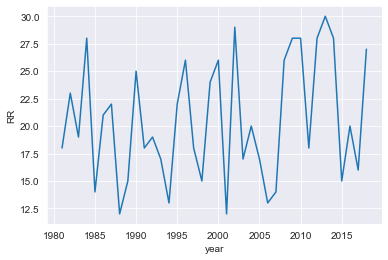

In [42]:
R10mm1.plot()

### R10mm (Threshold index) : Solenzara

In [43]:
QUERY10_2 = pr2 >= 10
pr10_2 = pr2.where(QUERY10_2, drop=True)
R10mm2 = (pr10_2.groupby(pr10_2.time.dt.year).count())

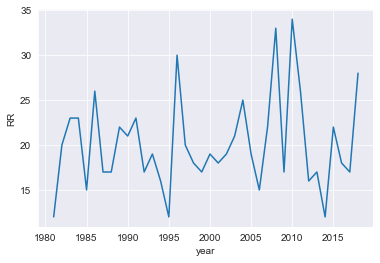

In [44]:
R10mm2.plot()

In [45]:
R10mm= R10mm1.to_dataset(name = 'Ajaccio')
R10mm['Solenzara'] = R10mm2

In [46]:
R10mm.head()

<xarray.Dataset>
Dimensions:    (year: 5)
Coordinates:
  * year       (year) int64 1981 1982 1983 1984 1985
Data variables:
    Ajaccio    (year) int32 18 23 19 28 14
    Solenzara  (year) int32 12 20 23 23 15

### Creating a dataframe for annual values of R10mm

In [47]:
R10mm = R10mm.to_dataframe()
R10mm.index = pd.to_datetime(R10mm.index.astype(str), format='%Y')
R10mm['Years'] = R10mm.index.year

In [48]:
R10mm.head()

,Ajaccio,Solenzara,Years
year,,,
1981-01-01,18,12,1981
1982-01-01,23,20,1982
1983-01-01,19,23,1983
1984-01-01,28,23,1984
1985-01-01,14,15,1985


### R20mm (Threshold index) : Ajaccio

In [49]:
QUERY20_1 = pr1 >= 20
pr20_1 = pr1.where(QUERY20_1, drop=True)
R20mm1 = (pr20_1.groupby(pr20_1.time.dt.year).count())

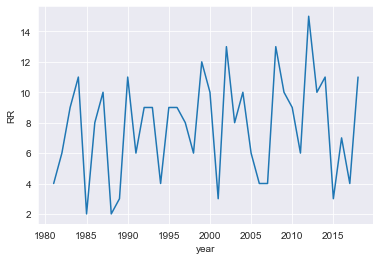

In [50]:
R20mm1.plot()

### R20mm (Threshold index) : Solenzara

In [51]:
QUERY20_2 = pr2 >= 20
pr20_2 = pr2.where(QUERY20_2, drop=True)
R20mm2 = (pr20_2.groupby(pr20_2.time.dt.year).count())

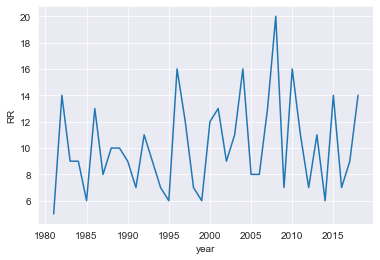

In [52]:
R20mm2.plot()

In [53]:
R20mm= R20mm1.to_dataset(name = 'Ajaccio')
R20mm['Solenzara'] = R20mm2

In [54]:
R20mm.head()

<xarray.Dataset>
Dimensions:    (year: 5)
Coordinates:
  * year       (year) int64 1981 1982 1983 1984 1985
Data variables:
    Ajaccio    (year) int32 4 6 9 11 2
    Solenzara  (year) int32 5 14 9 9 6

### Creating a dataframe for annual values of R20mm

In [55]:
R20mm = R20mm.to_dataframe()
R20mm.index = pd.to_datetime(R20mm.index.astype(str), format='%Y')
R20mm['Years'] = R20mm.index.year

In [56]:
R20mm.head()

,Ajaccio,Solenzara,Years
year,,,
1981-01-01,4,5,1981
1982-01-01,6,14,1982
1983-01-01,9,9,1983
1984-01-01,11,9,1984
1985-01-01,2,6,1985


### CDD (Duration index) : Ajaccio

In [57]:
pr1.attrs
pr1.attrs['units'] = 'mm/day'

#### Yearly

In [58]:
pr1_CDD = xc.icclim.CDD(pr1, thresh = '1 mm/day', freq = 'Y')

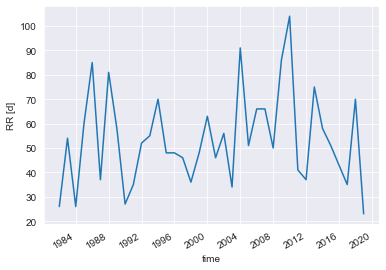

In [59]:
pr1_CDD.plot()

#### Monthly

In [60]:
pr1_CDD_monthly = xc.icclim.CDD(pr1, thresh = '1 mm/day', freq = 'M')

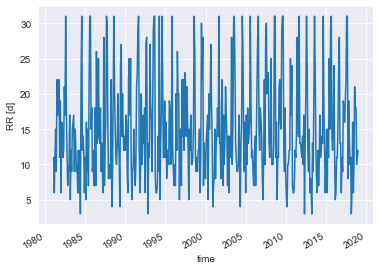

In [61]:
pr1_CDD_monthly.plot()

### CDD (Duration index) : Solenzara

In [62]:
pr2.attrs
pr2.attrs['units'] = 'mm/day'

#### Yearly

In [63]:
pr2_CDD = xc.icclim.CDD(pr2, thresh = '1 mm/day', freq = 'Y')

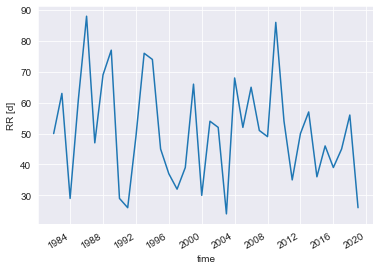

In [64]:
pr2_CDD.plot()

#### Monthly

In [65]:
pr2_CDD_monthly = xc.icclim.CDD(pr2, thresh = '1 mm/day', freq = 'M') 

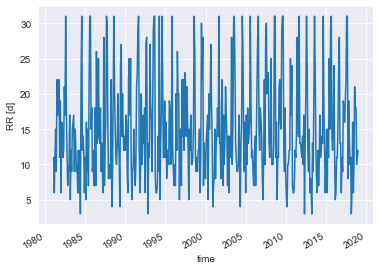

In [66]:
pr1_CDD_monthly.plot()

### Creating a dataframe for monthly values of CDD

In [67]:
CDD_monthly = pr1_CDD_monthly.to_dataframe()
CDD_monthly.rename(columns = {'RR':'Ajaccio'}, inplace = True)

CDD_monthly['Solenzara'] = pr2_CDD_monthly.to_dataframe().RR
CDD_monthly['Years'] = CDD_monthly.index.year

In [68]:
CDD_monthly.head()

,Ajaccio,Solenzara,Years
time,,,
1981-01-31,11,11,1981
1981-02-28,6,9,1981
1981-03-31,11,14,1981
1981-04-30,15,13,1981
1981-05-31,9,10,1981


### Creating a dataframe for yearly values of CDD

In [69]:
CDD_yearly = pr1_CDD.to_dataframe()
CDD_yearly.rename(columns = {'RR':'Ajaccio'}, inplace = True)

CDD_yearly['Solenzara'] = pr2_CDD.to_dataframe().RR
CDD_yearly['Years'] = CDD_yearly.index.year

In [70]:
CDD_yearly.head()

,Ajaccio,Solenzara,Years
time,,,
1981-12-31,26,50,1981
1982-12-31,54,63,1982
1983-12-31,26,29,1983
1984-12-31,60,61,1984
1985-12-31,85,88,1985


### CWD (Duration index) : Ajaccio

#### Yearly

In [71]:
pr1_CWD = xc.icclim.CWD(pr1, thresh = '1 mm/day', freq = 'Y')

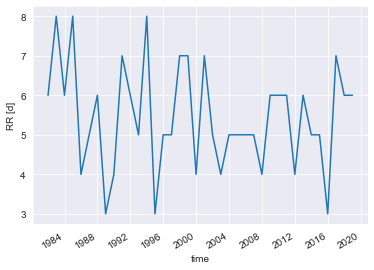

In [72]:
pr1_CWD.plot()

#### Monthly

In [73]:
pr1_CWD_monthly = xc.icclim.CWD(pr1, thresh = '1 mm/day', freq = 'M')

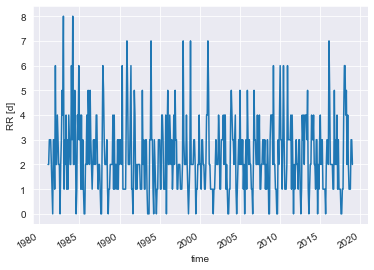

In [74]:
pr1_CWD_monthly.plot()

#### Seasonal Climatology

In [75]:
pr1_CWD_seasonal = pr1_CWD_monthly.groupby('time.season').sum('time')

### CWD (Duration index) : Solenzara

#### Yearly

In [76]:
pr2_CWD = xc.icclim.CWD(pr2, thresh = '1 mm/day', freq = 'Y')

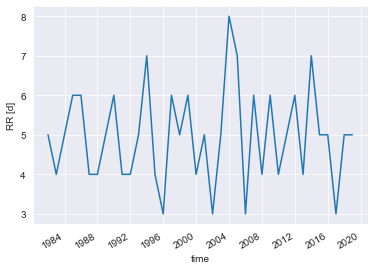

In [77]:
pr2_CWD.plot()

#### Monthly

In [78]:
pr2_CWD_monthly = xc.icclim.CWD(pr2, thresh = '1 mm/day', freq = 'M')

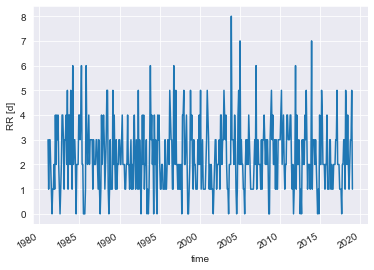

In [79]:
pr2_CWD_monthly.plot()

#### Seasonal Climatology

In [80]:
pr2_CWD_seasonal = pr2_CWD_monthly.groupby('time.season').sum('time')

### Creating a dataframe for monthly values of CWD

In [81]:
CWD_monthly = pr1_CWD_monthly.to_dataframe()
CWD_monthly.rename(columns = {'RR':'Ajaccio'}, inplace = True)

CWD_monthly['Solenzara'] = pr2_CWD_monthly.to_dataframe().RR
CWD_monthly['Years'] = CWD_monthly.index.year

In [82]:
CWD_monthly.head()

,Ajaccio,Solenzara,Years
time,,,
1981-01-31,2,3,1981
1981-02-28,2,1,1981
1981-03-31,3,3,1981
1981-04-30,3,3,1981
1981-05-31,3,2,1981


### Creating a dataframe for yearly values of CWD

In [83]:
CWD_yearly = pr1_CWD.to_dataframe()
CWD_yearly.rename(columns = {'RR':'Ajaccio'}, inplace = True)

CWD_yearly['Solenzara'] = pr2_CWD.to_dataframe().RR
CWD_yearly['Years'] = CWD_yearly.index.year

In [84]:
CWD_yearly.head()

,Ajaccio,Solenzara,Years
time,,,
1981-12-31,6,5,1981
1982-12-31,8,4,1982
1983-12-31,6,5,1983
1984-12-31,8,6,1984
1985-12-31,4,6,1985


## Annual Bar plots of temperature indices

In [85]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0.99, 'Annual Barplots of Temperature indices')

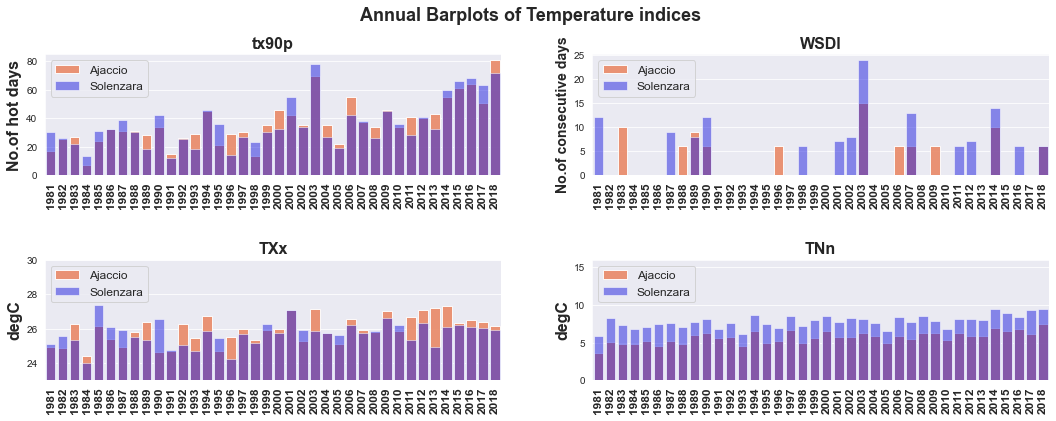

In [86]:
#Barplots
#temperature indices
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(18,6))
plt.subplots_adjust(hspace=0.7, wspace=0.2)
sns.barplot(x='Years', y='Ajaccio', data=tx90p_, color='coral', alpha=0.9, ax=ax1, label='Ajaccio')
sns.barplot(x='Years', y='Solenzara', data=tx90p_, color='blue',alpha=0.5, ax=ax1, label='Solenzara')
ax1.set_ylabel("No.of hot days", fontsize=16, fontweight='bold')
ax1.set_xlabel("")
ax1.set_xticklabels(tx90p_.Years, rotation= 90, fontsize=12,fontweight='bold')
#ax1.set_yticklabels(tx90p_.Ajaccio, fontsize=12, fontweight='bold')
ax1.legend(loc='upper left', fontsize=12)

ax1.set_title("tx90p", fontsize=16, fontweight='bold')

sns.barplot(x='Years', y='Ajaccio', data=WSDI_, color='coral', alpha=0.9, ax=ax2, label='Ajaccio')
sns.barplot(x='Years', y='Solenzara', data=WSDI_, color='blue',alpha=0.5, ax=ax2, label='Solenzara')
ax2.set_ylabel("No.of consecutive days", fontsize=14, fontweight='bold')
ax2.set_xlabel("")
ax2.set_xticklabels(WSDI_.Years, rotation= 90, fontsize=12,fontweight='bold')
#ax2.set_yticklabels(WSDI_.Ajaccio, fontsize=12, fontweight='bold')
ax2.legend(loc='upper left', fontsize=12)

ax2.set_title("WSDI", fontsize=16, fontweight='bold')

sns.barplot(x='Years', y='Ajaccio', data=TXx_AA, color='coral', alpha=0.9, ax=ax3, label='Ajaccio')
sns.barplot(x='Years', y='Solenzara', data=TXx_AA, color='blue',alpha=0.5, ax=ax3, label='Solenzara')
ax3.set_ylabel("degC", fontsize=16, fontweight='bold')
ax3.set_xlabel("")
ax3.set_ylim(23,30)
ax3.set_xticklabels(TXx_AA.Years, rotation= 90, fontsize=12,fontweight='bold')
#ax3.set_yticklabels(TXx_AA.Ajaccio, fontsize=12,fontweight='bold')
ax3.legend(loc='upper left', fontsize=12)

ax3.set_title("TXx", fontsize=16, fontweight='bold')

sns.barplot(x='Years', y='Ajaccio', data=TNn_AA, color='coral', alpha=0.9, ax=ax4, label='Ajaccio')
sns.barplot(x='Years', y='Solenzara', data=TNn_AA, color='blue',alpha=0.5, ax=ax4, label='Solenzara')
ax4.set_ylabel("degC", fontsize=16, fontweight='bold')
ax4.set_xlabel("")
ax4.set_ylim(0,16)
# ax4.set_yticks(0,20,5)
ax4.set_xticklabels(TXx_AA.Years, rotation= 90, fontsize=12,fontweight='bold')
#ax4.set_yticklabels(TXx_AA.Ajaccio, fontsize=12,fontweight='bold')
ax4.legend(loc='upper left', fontsize=12)

ax4.set_title("TNn", fontsize=16, fontweight='bold')

f.suptitle('Annual Barplots of Temperature indices', fontsize=18, y=0.99, fontweight='bold')
#f.savefig(path + 'Barplot.png',dpi=300,bbox_inches='tight')

### Decadal Bar plots

Text(0.5, 0.99, 'Decadal Barplots of Temperature indices')

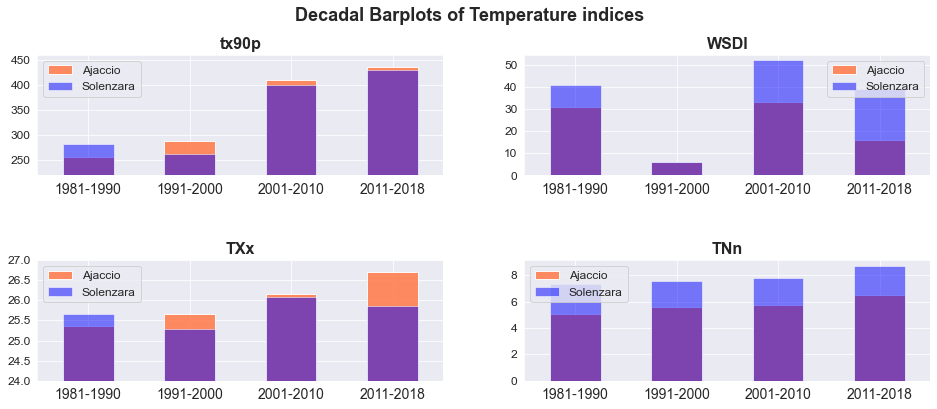

In [87]:
##barplot (Decadal)
#temperature indices
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(16,6))
plt.subplots_adjust(hspace=0.7)

tx90p_['Ajaccio'].resample('10AS').sum().plot.bar(ax=ax1, color='coral', alpha=0.9, label='Ajaccio', fontsize=12)
tx90p_['Solenzara'].resample('10AS').sum().plot.bar(ax=ax1, color='blue', alpha=0.5, label='Solenzara', fontsize=12)
ax1.tick_params(axis='x', labelrotation=0)
# ax1.set_xticklabels(tx90p_)
ax1.set_xticklabels(['1981-1990','1991-2000','2001-2010','2011-2018'], fontsize=14)
ax1.set_title('tx90p', fontsize=16, fontweight='bold')
ax1.legend(fontsize=12)
ax1.set_xlabel("")
ax1.set_ylim(220,460)

WSDI_['Ajaccio'].resample('10AS').sum().plot.bar(ax=ax2, color='coral', alpha=0.9, label='Ajaccio', fontsize=12)
WSDI_['Solenzara'].resample('10AS').sum().plot.bar(ax=ax2, color='blue', alpha=0.5, label='Solenzara', fontsize=12)
ax2.tick_params(axis='x', labelrotation=0)
ax2.set_xticklabels(['1981-1990','1991-2000','2001-2010','2011-2018'], fontsize=14)
ax2.set_title('WSDI', fontsize=16, fontweight='bold')
ax2.legend(fontsize=12)
ax2.set_xlabel("")

TXx_AA['Ajaccio'].resample('10AS').mean().plot.bar(ax=ax3, color='coral', alpha=0.9, label='Ajaccio', fontsize=12)
TXx_AA['Solenzara'].resample('10AS').mean().plot.bar(ax=ax3, color='blue', alpha=0.5, label='Solenzara', fontsize=12)
ax3.tick_params(axis='x', labelrotation=0)
ax3.set_xticklabels(['1981-1990','1991-2000','2001-2010','2011-2018'], fontsize=14)
ax3.set_title('TXx', fontsize=16, fontweight='bold')
ax3.legend(fontsize=12)
ax3.set_ylim(24,27)
ax3.set_xlabel("")

TNn_AA['Ajaccio'].resample('10AS').mean().plot.bar(ax=ax4, color='coral', alpha=0.9, label='Ajaccio', fontsize=12)
TNn_AA['Solenzara'].resample('10AS').mean().plot.bar(ax=ax4, color='blue', alpha=0.5, label='Solenzara', fontsize=12)
ax4.tick_params(axis='x', labelrotation=0)
ax4.set_xticklabels(['1981-1990','1991-2000','2001-2010','2011-2018'], fontsize=14)
ax4.set_title('TNn', fontsize=16, fontweight='bold')
ax4.legend(fontsize=12)
ax4.set_xlabel("")

f.suptitle('Decadal Barplots of Temperature indices', fontsize=18, y=0.99, fontweight='bold')
#f.savefig(path + 'D_Barplot.png',dpi=300,bbox_inches='tight')

## Distribution of Data

Text(0.5, 0.97, 'Distribution of data for Temperature indices')

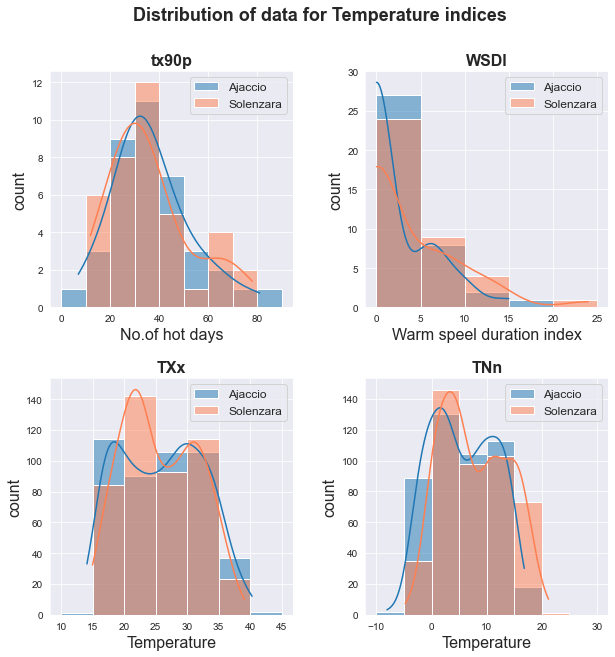

In [88]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
sns.histplot(tx90p_['Ajaccio'],binwidth=10, binrange=(0,90), kde=True, ax=ax1, label='Ajaccio')
sns.histplot(tx90p_['Solenzara'],binwidth=10, binrange=(0,90), kde=True, ax=ax1, color='coral', label='Solenzara')
sns.histplot(WSDI_['Ajaccio'], binwidth=5, binrange=(0,25), kde=True, ax=ax2, label='Ajaccio')
sns.histplot(WSDI_['Solenzara'], binwidth=5, binrange=(0,25), kde=True, ax=ax2, color='coral', label='Solenzara')
sns.histplot(TXx_['Ajaccio'], binwidth=5, binrange=(10,45), kde=True, ax=ax3, label='Ajaccio')
sns.histplot(TXx_['Solenzara'], binwidth=5, binrange=(10,45), kde=True, ax=ax3, color='coral', label='Solenzara')
sns.histplot(TNn_['Ajaccio'], binwidth=5, binrange=(-10,30), kde=True, ax=ax4, label='Ajaccio')
sns.histplot(TNn_['Solenzara'], binwidth=5, binrange=(-10,30), kde=True, ax=ax4, color='coral', label='Solenzara')

ax1.set_title("tx90p", fontsize=16, fontweight='bold')
ax1.set_xlabel("No.of hot days", fontsize=16)
ax1.set_ylabel('count',fontsize=16)
ax1.legend(fontsize=12)
ax2.set_title("WSDI", fontsize=16, fontweight='bold')
ax2.set_xlabel("Warm speel duration index", fontsize=16)
ax2.set_ylabel('count',fontsize=16)
ax2.legend(fontsize=12)
ax3.set_title("TXx", fontsize=16, fontweight='bold')
ax3.set_xlabel("Temperature", fontsize=16)
ax3.set_ylabel('count',fontsize=16)
ax3.legend(fontsize=12)
ax4.set_title("TNn", fontsize=16, fontweight='bold')
ax4.set_xlabel("Temperature", fontsize=16)
ax4.set_ylabel('count',fontsize=16)
ax4.legend(fontsize=12)

f.suptitle('Distribution of data for Temperature indices', fontsize=18, y=0.97, fontweight='bold')
#f.savefig(path + 'hist.png',dpi=300,bbox_inches='tight')

## Boxplots (Annual)

Text(0.5, 1.19, 'Boxplots of temperature indices 1981 - 2018')

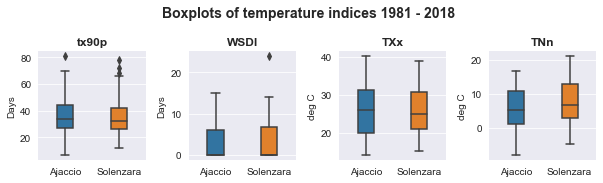

In [89]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(10,2))
plt.subplots_adjust(wspace=0.4)

sns.boxplot(data = tx90p_[['Ajaccio','Solenzara']], width=0.3, ax=ax1)
sns.boxplot(data = WSDI_[['Ajaccio','Solenzara']], width=0.3, ax=ax2)
sns.boxplot(data = TXx_[['Ajaccio','Solenzara']], width=0.3, ax=ax3)
sns.boxplot(data = TNn_[['Ajaccio','Solenzara']], width=0.3, ax=ax4)

ax1.set_title('tx90p', fontsize=12, fontweight='bold')
ax1.set_ylabel('Days')
ax2.set_title('WSDI', fontsize=12, fontweight='bold')
ax2.set_ylabel('Days')
ax3.set_title('TXx', fontsize=12, fontweight='bold')
ax3.set_ylabel('deg C')
ax4.set_title('TNn', fontsize=12, fontweight='bold')
ax4.set_ylabel('deg C')

sns.despine(top=True,left=True,right=True,bottom=False)
fig.suptitle('Boxplots of temperature indices 1981 - 2018',y=1.19,fontweight='bold', fontsize=14)
#fig.savefig(path + 'boxt.png',dpi=300,bbox_inches='tight')

### Boxplots (Decadal)

Text(0.5, 0.99, 'Decadal Boxplots of Temperature indices')

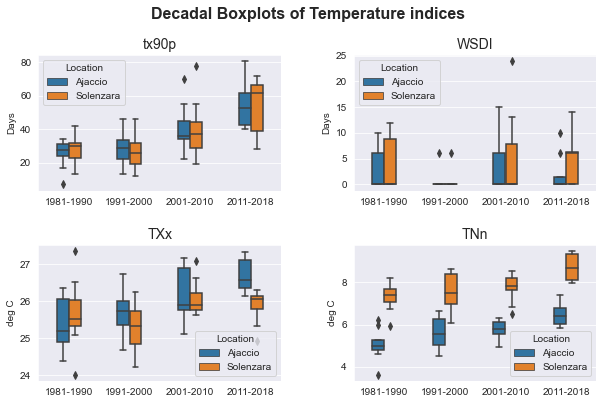

In [90]:
d1 = tx90p_['1981-01-01':'1990-01-01']
d2 = tx90p_['1991-01-01':'2000-01-01']
d3 = tx90p_['2001-01-01':'2010-01-01']
d4 = tx90p_['2009-01-01':'2018-01-01']

db_t = pd.DataFrame()

db_t['tx90p'] = tx90p_['Ajaccio'].append(tx90p_['Solenzara']).reset_index(drop=True)
db_t['WSDI'] = WSDI_['Ajaccio'].append(WSDI_['Solenzara']).reset_index(drop=True)
db_t['TXx'] = TXx_AA['Ajaccio'].append(TXx_AA['Solenzara']).reset_index(drop=True)
db_t['TNn'] = TNn_AA['Ajaccio'].append(TNn_AA['Solenzara']).reset_index(drop=True)

db_t.loc[0:38, 'Location'] = 'Ajaccio'
db_t.loc[38:76, 'Location'] = 'Solenzara'

db_t.loc[0:10, 'Decade'] = '1981-1990'
db_t.loc[10:20, 'Decade'] = '1991-2000'
db_t.loc[20:30, 'Decade'] = '2001-2010'
db_t.loc[30:38, 'Decade'] = '2011-2018'
db_t.loc[38:48, 'Decade'] = '1981-1990'
db_t.loc[48:58, 'Decade'] = '1991-2000'
db_t.loc[58:68, 'Decade'] = '2001-2010'
db_t.loc[68:76, 'Decade'] = '2011-2018'

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(10,6))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

sns.boxplot(x='Decade', y='tx90p', hue='Location', data=db_t, width=0.4, ax=ax1)
sns.boxplot(x='Decade', y='WSDI', hue='Location', data=db_t, width=0.4, ax=ax2)
sns.boxplot(x='Decade', y='TXx', hue='Location', data=db_t, width=0.4, ax=ax3)
sns.boxplot(x='Decade', y='TNn', hue='Location', data=db_t, width=0.4, ax=ax4)

ax1.set_title('tx90p', fontsize=14)
ax1.set_ylabel('Days')
ax1.set_xlabel('')
ax2.set_title('WSDI', fontsize=14)
ax2.set_ylabel('Days')
ax2.set_xlabel('')
ax3.set_title('TXx', fontsize=14)
ax3.set_ylabel('deg C')
ax3.set_xlabel('')
ax4.set_title('TNn', fontsize=14)
ax4.set_ylabel('deg C')
ax4.set_xlabel('')

f.suptitle('Decadal Boxplots of Temperature indices', fontsize=16, y=0.99, fontweight='bold')
#f.savefig(path + 'boxt_d.png',dpi=300,bbox_inches='tight')

## Annual Bar plots of precipitation indices

Text(0.5, 0.99, 'Annual Barplots of Precipitation indices')

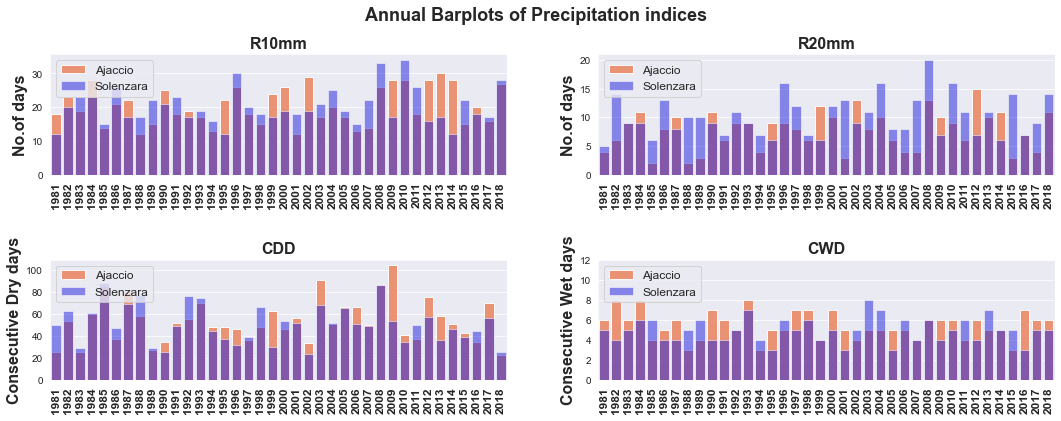

In [91]:
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(18,6))
plt.subplots_adjust(hspace=0.7, wspace=0.2)
sns.barplot(x='Years', y='Ajaccio', data=R10mm, color='coral', alpha=0.9, ax=ax1, label='Ajaccio')
sns.barplot(x='Years', y='Solenzara', data=R10mm, color='blue',alpha=0.5, ax=ax1, label='Solenzara')
ax1.set_xlabel("")
ax1.set_ylabel("No.of days", fontsize=16, fontweight='bold')
ax1.set_xticklabels(R10mm.index.year, rotation= 90, fontsize=12,fontweight='bold')
ax1.legend(loc='upper left', fontsize=12)

ax1.set_title("R10mm", fontsize=16, fontweight='bold')

sns.barplot(x='Years', y='Ajaccio', data=R20mm, color='coral', alpha=0.9, ax=ax2, label='Ajaccio')
sns.barplot(x='Years', y='Solenzara', data=R20mm, color='blue',alpha=0.5, ax=ax2, label='Solenzara')
ax2.set_xlabel("")
ax2.set_ylabel("No.of days", fontsize=16, fontweight='bold')
ax2.set_xticklabels(R20mm.index.year, rotation= 90, fontsize=12,fontweight='bold')
ax2.legend(loc='upper left', fontsize=12)

ax2.set_title("R20mm", fontsize=16, fontweight='bold')

sns.barplot(x='Years', y='Ajaccio', data=CDD_yearly, color='coral', alpha=0.9, ax=ax3, label='Ajaccio')
sns.barplot(x='Years', y='Solenzara', data=CDD_yearly, color='blue',alpha=0.5, ax=ax3, label='Solenzara')
ax3.set_xlabel("")
ax3.set_ylabel("Consecutive Dry days",fontsize=16, fontweight='bold')
ax3.set_xticklabels(CDD_yearly.Years, rotation= 90, fontsize=12,fontweight='bold')
ax3.legend(loc='upper left', fontsize=12)

ax3.set_title("CDD", fontsize=16, fontweight='bold')

sns.barplot(x='Years', y='Ajaccio', data=CWD_yearly, color='coral', alpha=0.9, ax=ax4, label='Ajaccio')
sns.barplot(x='Years', y='Solenzara', data=CWD_yearly, color='blue',alpha=0.5, ax=ax4, label='Solenzara')
ax4.set_xlabel("")
ax4.set_ylabel("Consecutive Wet days", fontsize=16, fontweight='bold')
ax4.set_ylim(0,12)
ax4.set_xticklabels(CWD_yearly.Years, rotation= 90, fontsize=12,fontweight='bold')
ax4.legend(loc='upper left', fontsize=12)

ax4.set_title("CWD", fontsize=16, fontweight='bold')

f.suptitle('Annual Barplots of Precipitation indices', fontsize=18, y=0.99, fontweight='bold')
#f.savefig(path + 'Barplot_p.png',dpi=300,bbox_inches='tight')

### Decadal Bar plots

Text(0.5, 0.99, 'Decadal Barplots of Precipitation indices')

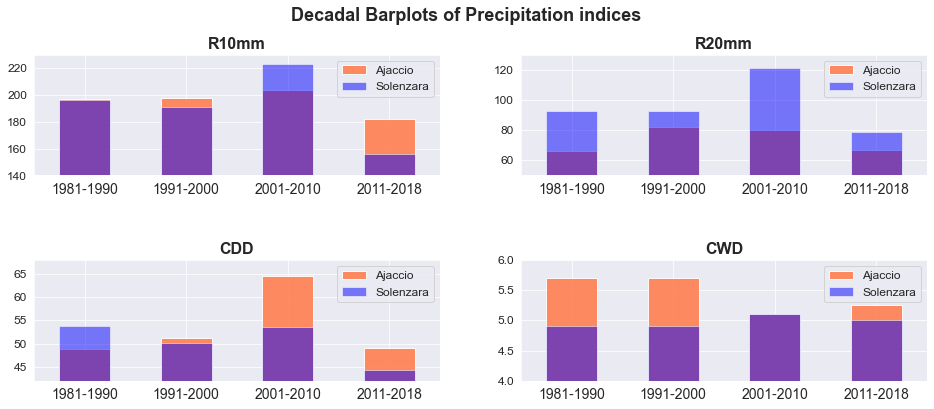

In [92]:
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(16,6))
plt.subplots_adjust(hspace=0.7)

R10mm['Ajaccio'].resample('10AS').sum().plot.bar(ax=ax1, color='coral', alpha=0.9, label='Ajaccio', fontsize=12)
R10mm['Solenzara'].resample('10AS').sum().plot.bar(ax=ax1, color='blue', alpha=0.5, label='Solenzara', fontsize=12)
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_xticklabels(['1981-1990','1991-2000','2001-2010','2011-2018'], fontsize=14)
ax1.set_title('R10mm', fontsize=16, fontweight='bold')
ax1.legend(fontsize=12)
ax1.set_xlabel("")
ax1.set_ylim(140,230)

R20mm['Ajaccio'].resample('10AS').sum().plot.bar(ax=ax2, color='coral', alpha=0.9, label='Ajaccio', fontsize=12)
R20mm['Solenzara'].resample('10AS').sum().plot.bar(ax=ax2, color='blue', alpha=0.5, label='Solenzara', fontsize=12)
ax2.tick_params(axis='x', labelrotation=0)
ax2.set_xticklabels(['1981-1990','1991-2000','2001-2010','2011-2018'], fontsize=14)
ax2.set_title('R20mm', fontsize=16, fontweight='bold')
ax2.legend(fontsize=12)
ax2.set_xlabel("")
ax2.set_ylim(50,130)

CDD_yearly['Ajaccio'].resample('10AS').mean().plot.bar(ax=ax3, color='coral', alpha=0.9, label='Ajaccio', fontsize=12)
CDD_yearly['Solenzara'].resample('10AS').mean().plot.bar(ax=ax3, color='blue', alpha=0.5, label='Solenzara', fontsize=12)
ax3.tick_params(axis='x', labelrotation=0)
ax3.set_xticklabels(['1981-1990','1991-2000','2001-2010','2011-2018'], fontsize=14)
ax3.set_title('CDD', fontsize=16, fontweight='bold')
ax3.legend(fontsize=12)
ax3.set_xlabel("")
ax3.set_ylim(42,68)

CWD_yearly['Ajaccio'].resample('10AS').mean().plot.bar(ax=ax4, color='coral', alpha=0.9, label='Ajaccio', fontsize=12)
CWD_yearly['Solenzara'].resample('10AS').mean().plot.bar(ax=ax4, color='blue', alpha=0.5, label='Solenzara', fontsize=12)
ax4.tick_params(axis='x', labelrotation=0)
ax4.set_xticklabels(['1981-1990','1991-2000','2001-2010','2011-2018'], fontsize=14)
ax4.set_title('CWD', fontsize=16, fontweight='bold')
ax4.legend(fontsize=12)
ax4.set_xlabel("")
ax4.set_ylim(4,6,1)

f.suptitle('Decadal Barplots of Precipitation indices', fontsize=18, y=0.99, fontweight='bold')
#f.savefig(path + 'D_Barplot_p.png',dpi=300,bbox_inches='tight')

## Distribution of Data

Text(0.5, 0.97, 'Distribution of data for Precipitation indices')

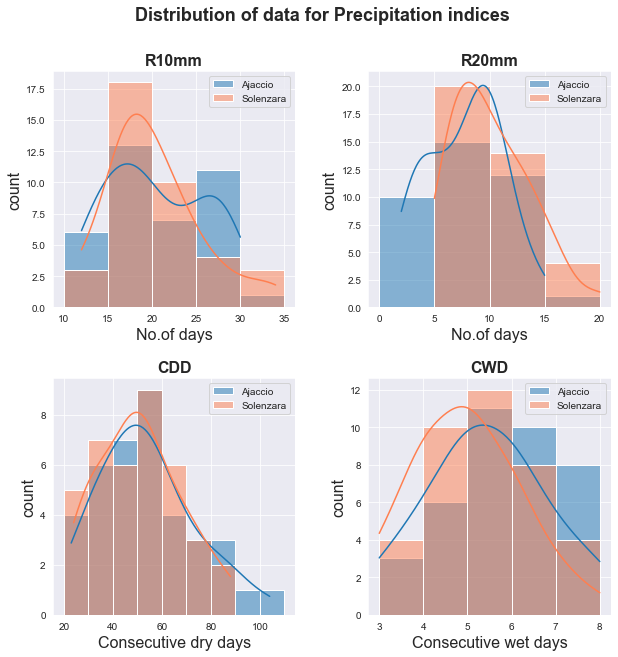

In [93]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
sns.histplot(data=R10mm['Ajaccio'], binwidth=5, binrange=(10,35), kde=True, ax=ax1, label='Ajaccio')
sns.histplot(data=R10mm['Solenzara'], binwidth=5, binrange=(10,35), kde=True, ax=ax1, color='coral', label='Solenzara')
sns.histplot(data=R20mm['Ajaccio'], binwidth=5, binrange=(0,20), kde=True, ax=ax2, label='Ajaccio')
sns.histplot(data=R20mm['Solenzara'], binwidth=5, binrange=(0,20), kde=True, ax=ax2, color='coral', label='Solenzara')
sns.histplot(data=CDD_yearly['Ajaccio'], binwidth=10, binrange=(20,110), kde=True, ax=ax3, label='Ajaccio')
sns.histplot(data=CDD_yearly['Solenzara'], binwidth=10, binrange=(20,110),  kde=True, ax=ax3, color='coral', label='Solenzara')
sns.histplot(data=CWD_yearly['Ajaccio'], binwidth=1, binrange=(3,8), kde=True, ax=ax4, label='Ajaccio')
sns.histplot(data=CWD_yearly['Solenzara'], binwidth=1, binrange=(3,8), kde=True, ax=ax4, color='coral', label='Solenzara')

ax1.set_title("R10mm", fontsize=16, fontweight='bold')
ax1.set_xlabel("No.of days", fontsize=16)
ax1.set_ylabel('count',fontsize=16)
ax1.legend()
ax2.set_title("R20mm", fontsize=16, fontweight='bold')
ax2.set_xlabel("No.of days", fontsize=16)
ax2.set_ylabel('count',fontsize=16)
ax2.legend()
ax3.set_title("CDD", fontsize=16, fontweight='bold')
ax3.set_xlabel('Consecutive dry days', fontsize=16)
ax3.set_ylabel('count',fontsize=16)
ax3.legend()
ax4.set_title("CWD", fontsize=16, fontweight='bold')
ax4.set_xlabel("Consecutive wet days", fontsize=16)
ax4.set_ylabel('count',fontsize=16)
ax4.legend()

f.suptitle('Distribution of data for Precipitation indices', fontsize=18, y=0.97, fontweight='bold')
#f.savefig(path + 'hist_p.png',dpi=300,bbox_inches='tight')

## Box plots (Annual)

Text(0.5, 1.19, 'Boxplots of precipitation indices 1981 - 2018')

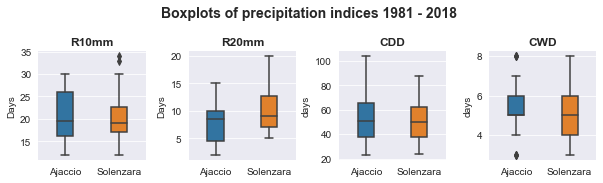

In [94]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(10,2))
plt.subplots_adjust(wspace=0.4)

sns.boxplot(data = R10mm[['Ajaccio','Solenzara']], width=0.3, ax=ax1)
sns.boxplot(data = R20mm[['Ajaccio','Solenzara']], width=0.3, ax=ax2)
sns.boxplot(data = CDD_yearly[['Ajaccio','Solenzara']], width=0.3, ax=ax3)
sns.boxplot(data = CWD_yearly[['Ajaccio','Solenzara']], width=0.3, ax=ax4)

ax1.set_title('R10mm', fontsize=12, fontweight='bold')
ax1.set_ylabel('Days')
ax2.set_title('R20mm', fontsize=12, fontweight='bold')
ax2.set_ylabel('Days')
ax3.set_title('CDD', fontsize=12, fontweight='bold')
ax3.set_ylabel('days')
ax4.set_title('CWD', fontsize=12, fontweight='bold')
ax4.set_ylabel('days')

sns.despine(top=True,left=True,right=True,bottom=False)
fig.suptitle('Boxplots of precipitation indices 1981 - 2018',y=1.19,fontsize=14, fontweight='bold')
#fig.savefig(path + 'boxp.png',dpi=300,bbox_inches='tight')

### Box plots (Decadal)

Text(0.5, 0.99, 'Decadal Boxplots of Precipitation indices')

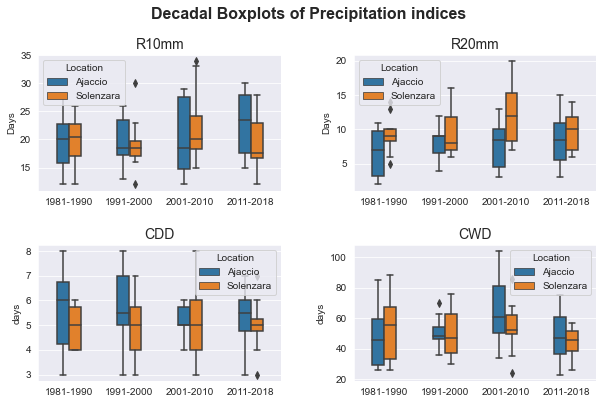

In [95]:
db_p = pd.DataFrame()

db_p['R10mm'] = R10mm['Ajaccio'].append(R10mm['Solenzara']).reset_index(drop=True)
db_p['R20mm'] = R20mm['Ajaccio'].append(R20mm['Solenzara']).reset_index(drop=True)
db_p['CWD'] = CWD_yearly['Ajaccio'].append(CWD_yearly['Solenzara']).reset_index(drop=True)
db_p['CDD'] = CDD_yearly['Ajaccio'].append(CDD_yearly['Solenzara']).reset_index(drop=True)

db_p.loc[0:38, 'Location'] = 'Ajaccio'
db_p.loc[38:76, 'Location'] = 'Solenzara'

db_p.loc[0:10, 'Decade'] = '1981-1990'
db_p.loc[10:20, 'Decade'] = '1991-2000'
db_p.loc[20:30, 'Decade'] = '2001-2010'
db_p.loc[30:38, 'Decade'] = '2011-2018'
db_p.loc[38:48, 'Decade'] = '1981-1990'
db_p.loc[48:58, 'Decade'] = '1991-2000'
db_p.loc[58:68, 'Decade'] = '2001-2010'
db_p.loc[68:76, 'Decade'] = '2011-2018'

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(10,6))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

sns.boxplot(x='Decade', y='R10mm', hue='Location', data=db_p, width=0.4, ax=ax1)
sns.boxplot(x='Decade', y='R20mm', hue='Location', data=db_p, width=0.4, ax=ax2)
sns.boxplot(x='Decade', y='CWD', hue='Location', data=db_p, width=0.4, ax=ax3)
sns.boxplot(x='Decade', y='CDD', hue='Location', data=db_p, width=0.4, ax=ax4)

ax1.set_title('R10mm', fontsize=14)
ax1.set_ylabel('Days')
ax1.set_xlabel('')
ax2.set_title('R20mm', fontsize=14)
ax2.set_ylabel('Days')
ax2.set_xlabel('')
ax3.set_title('CDD', fontsize=14)
ax3.set_ylabel('days')
ax3.set_xlabel('')
ax4.set_title('CWD', fontsize=14)
ax4.set_ylabel('days')
ax4.set_xlabel('')

f.suptitle('Decadal Boxplots of Precipitation indices', fontsize=16, y=0.99, fontweight='bold')
#f.savefig(path + 'boxp_d.png',dpi=300,bbox_inches='tight')

### Dataframes 
tx90p_, WSDI_, TXx_AA, TNn_AA : Dataframes of temperature indices

R10mm, R20mm, CDD_yearly, CWD_yearly : Dataframes of precipitation indices

## Transformations

#### Standardization

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
tx90p_ = tx90p_.reset_index()

In [138]:
tx90p_.head()

,index,time,Ajaccio,Solenzara,Years
0,0,1981-01-01,17,30,1981
1,1,1982-01-01,25,26,1982
2,2,1983-01-01,27,22,1983
3,3,1984-01-01,7,13,1984
4,4,1985-01-01,24,31,1985


In [144]:
tx90p_ = tx90p_.drop(columns='index', axis=1)

In [152]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(tx90p_[['Ajaccio','Solenzara']])

In [164]:
df_scaled[:,0]
df_scaled[:,1]

array([-0.37251231, -0.6124355 , -0.85235868, -1.39218584, -0.31253152,
       -0.25255072,  0.16731485, -0.37251231, -1.09228186,  0.34725724,
       -1.45216664, -0.67241629, -1.09228186,  0.58718042, -0.01262754,
       -1.33220505, -0.5524547 , -0.79237788, -0.37251231, -0.25255072,
        1.12700759, -0.13258913,  2.50656589, -0.5524547 , -1.03230107,
        0.34725724,  0.10733406, -0.6124355 ,  0.52719963, -0.01262754,
       -0.4924739 ,  0.28727644, -0.25255072,  1.42691157,  1.78679634,
        1.90675793,  1.60685395,  2.14668112])

(array([5., 4., 9., 7., 4., 2., 1., 2., 2., 2.]),
 array([-1.45216664, -1.05629339, -0.66042013, -0.26454688,  0.13132637,
         0.52719963,  0.92307288,  1.31894613,  1.71481939,  2.11069264,
         2.50656589]),
 <BarContainer object of 10 artists>)

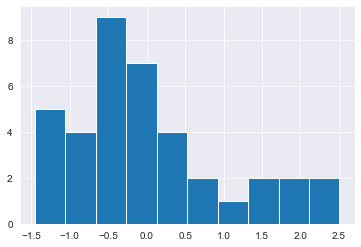

In [158]:
plt.hist(df_scaled[:,1])

(array([ 2.,  3.,  8., 10.,  5.,  4.,  2.,  2.,  1.,  1.]),
 array([-1.89762975e+00, -1.42330665e+00, -9.48983554e-01, -4.74660455e-01,
        -3.37356400e-04,  4.73985743e-01,  9.48308842e-01,  1.42263194e+00,
         1.89695504e+00,  2.37127814e+00,  2.84560124e+00]),
 <BarContainer object of 10 artists>)

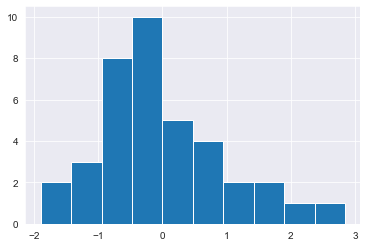

In [157]:
plt.hist(df_scaled[:,0])

In [166]:
tx90p_scaled = pd.DataFrame(data=df_scaled, columns=["Ajaccio", "Solenzara"])

(array([ 2.,  3.,  8., 10.,  5.,  4.,  2.,  2.,  1.,  1.]),
 array([-1.89762975e+00, -1.42330665e+00, -9.48983554e-01, -4.74660455e-01,
        -3.37356400e-04,  4.73985743e-01,  9.48308842e-01,  1.42263194e+00,
         1.89695504e+00,  2.37127814e+00,  2.84560124e+00]),
 <BarContainer object of 10 artists>)

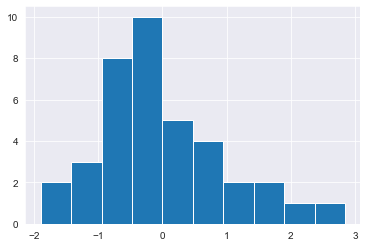

In [168]:
plt.hist(tx90p_scaled['Ajaccio'])

<AxesSubplot:>

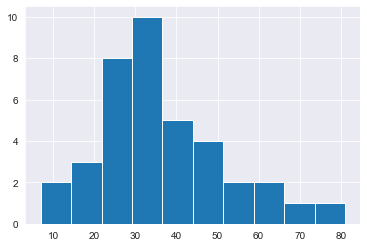

In [170]:
tx90p_['Ajaccio'].hist()

In [226]:
def standardization(df):
    
    df = df.reset_index()
    if any(tx90p_.columns) == 'index':
        df = df.drop(columns='index', axis=1)
    
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[['Ajaccio','Solenzara']])
    df_scaled = pd.DataFrame(data=df_scaled, columns=["Ajaccio", "Solenzara"])
    
    return df_scaled

In [231]:
standardization(R10mm)

,Ajaccio,Solenzara
0,-0.466168,-1.575330
1,0.446945,-0.030490
2,-0.283546,0.548825
3,1.360058,0.548825
4,-1.196659,-0.996015
5,0.081700,1.128140
6,0.264322,-0.609805
7,-1.561904,-0.609805
8,-1.014036,0.355720
9,0.812190,0.162615


In [233]:
TXx_AA.head()

,Ajaccio,Solenzara,Years
year,,,
1981-01-01,24.933333,25.091667,1981
1982-01-01,24.883333,25.558333,1982
1983-01-01,26.241667,25.316667,1983
1984-01-01,24.383333,24.008333,1984
1985-01-01,26.141667,27.350000,1985
